In [ ]:
import numpy as np 
import pandas as pd 


In [2]:
import matplotlib.pyplot as plt
import os

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation

import re

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
data = pd.read_csv( 'https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
data.columns

Index(['reviewText', 'Positive'], dtype='object')

In [5]:
data.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [6]:
data.Positive.value_counts()

1    15233
0     4767
Name: Positive, dtype: int64

In [7]:
data1 = data.copy()
data1.columns = ["Comment", "Label"]
data1.head()

,Comment,Label
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


* **Data transformation**

In [8]:
stop_words=set(stopwords.words('english'))
lzr = WordNetLemmatizer()

In [9]:
def text_processing(text):   
    # convert text into lowercase
    text = text.lower()

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)
    
    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    
    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    
    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # remove special characters from text
    text = re.sub(r'\W', ' ', text)

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text

In [10]:
nltk.download('omw-1.4')
data_copy = data1.copy()
data_copy.Comment = data_copy.Comment.apply(text_processing)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:

sentiments = SentimentIntensityAnalyzer()
data_copy["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data_copy["Comment"]]
data_copy["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data_copy["Comment"]]
data_copy["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data_copy["Comment"]]
data_copy['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data_copy["Comment"]]
score = data_copy["Compound"].values
sentiment = []
for i in score:
    if i > 0.0 :
        sentiment.append('Positive')
    else:
        sentiment.append('Negative')
data_copy["Sentiment"] = sentiment

In [12]:
data_copy.head()

,Comment,Label,Positive,Negative,Neutral,Compound,Sentiment
0,one best apps acording bunch people agree bomb...,1,0.306,0.146,0.548,0.5423,Positive
1,pretty good version game free lot different le...,1,0.682,0.000,0.318,0.9325,Positive
2,really cool game bunch level find golden egg s...,1,0.583,0.000,0.417,0.8687,Positive
3,silly game frustrating lot fun definitely reco...,1,0.686,0.154,0.160,0.8402,Positive
4,terrific game pad hr fun grandkids love great ...,1,0.714,0.000,0.286,0.9552,Positive


* **Final data**

In [13]:
data2=data_copy.drop(['Positive','Negative','Neutral','Compound'],axis=1)
data2.head()

,Comment,Label,Sentiment
0,one best apps acording bunch people agree bomb...,1,Positive
1,pretty good version game free lot different le...,1,Positive
2,really cool game bunch level find golden egg s...,1,Positive
3,silly game frustrating lot fun definitely reco...,1,Positive
4,terrific game pad hr fun grandkids love great ...,1,Positive


In [14]:
from sklearn.preprocessing import LabelEncoder

# from sklearn.feature_extraction.text import CountVectorizer
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [15]:
processed_data = {
    'Sentence':data_copy.Comment,
    'Label': data_copy.Label,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

,Sentence,Label,Sentiment
0,one best apps acording bunch people agree bomb...,1,1
1,pretty good version game free lot different le...,1,1
2,really cool game bunch level find golden egg s...,1,1
3,silly game frustrating lot fun definitely reco...,1,1
4,terrific game pad hr fun grandkids love great ...,1,1


In [16]:
processed_data['Sentiment'].value_counts()

1    16095
0     3905
Name: Sentiment, dtype: int64

In [17]:
final_data = processed_data.copy()

In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(final_data['Label'], final_data['Sentiment']))

[[ 2401  2366]
 [ 1504 13729]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(final_data['Label'], final_data['Sentiment']))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55      4767
           1       0.85      0.90      0.88     15233

    accuracy                           0.81     20000
   macro avg       0.73      0.70      0.72     20000
weighted avg       0.80      0.81      0.80     20000



In [21]:
corpus = []
for sentence in final_data['Sentence']:
    corpus.append(sentence)
corpus[0:5]

['one best apps acording bunch people agree bomb egg pig tnt king pig realustic stuff',
 'pretty good version game free lot different level play kid enjoy lot',
 'really cool game bunch level find golden egg super fun',
 'silly game frustrating lot fun definitely recommend fun time',
 'terrific game pad hr fun grandkids love great entertainment waiting long line']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = final_data["Label"].values

## Machine Learning Model 

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

* **Evaluation**

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1221,  182],
       [1840, 2757]], dtype=int64)

In [26]:
nb_score = accuracy_score(y_test, y_pred)
print('accuracy',nb_score)

accuracy 0.663


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.87      0.55      1403
           1       0.94      0.60      0.73      4597

    accuracy                           0.66      6000
   macro avg       0.67      0.74      0.64      6000
weighted avg       0.81      0.66      0.69      6000



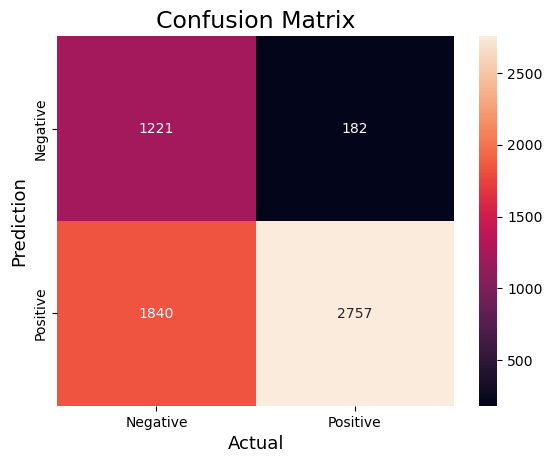

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()